In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from pandas.plotting import parallel_coordinates
# Assuming data is already in a DataFrame called df
df = pd.read_csv("/content/synthetic_dataset.csv")  # Or use your DataFrame directly
print(df.head())


   Feature_1  Feature_2  Feature_3  Feature_4  Feature_5  Feature_6  \
0  -1.501333  -1.766837  -0.235332   4.581652  -1.634143   0.848431   
1  -2.878047   0.286713   0.815574   2.442766   1.156776   0.850898   
2  -1.949885  -0.661083  -1.027814   2.942463  -3.351225  -0.649373   
3   0.538643   2.641699  -2.379506   0.293156  -1.204203   0.303819   
4   0.641048   1.143009   0.688393   1.143544  -1.306864  -1.116524   

   Feature_7  Feature_8  Feature_9  Feature_10  Target  
0  -2.381772   0.966296  -2.246889   -2.315019       2  
1  -0.553193   1.005089  -0.137372   -2.638035       0  
2  -2.544832  -0.748124   1.321304   -2.216647       2  
3   0.634335   1.569755   0.721563   -0.097268       1  
4   2.382851   2.339972   1.235812    0.711140       0  


✅ Synthetic dataset with 300 rows and 11 columns saved as synthetic_dataset.csv


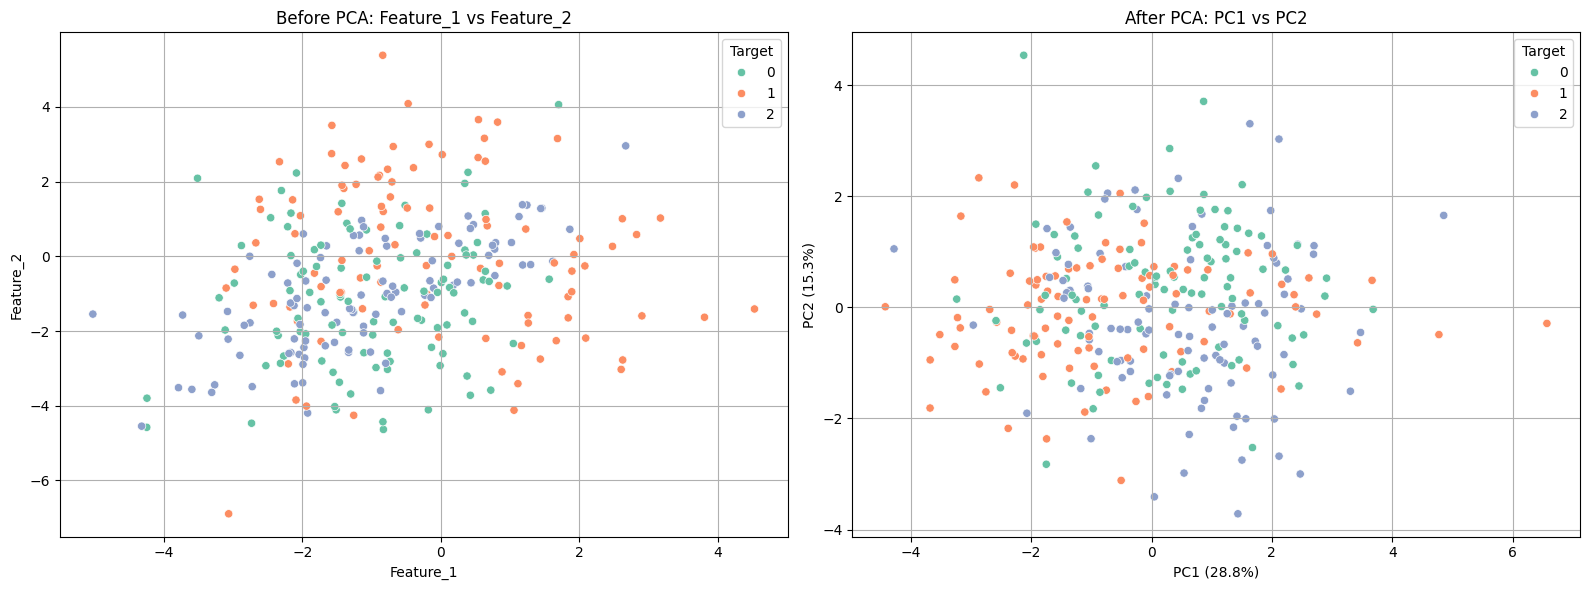

In [6]:
# Select features for PCA - excluding the target column
features = df.drop('Target', axis=1)

# Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Apply PCA
pca = PCA(n_components=2) # Reduce to 2 principal components
principal_components = pca.fit_transform(scaled_features)

# Create a new DataFrame for PCA results
pca_df = pd.DataFrame(data = principal_components, columns = ['PC1', 'PC2'])
pca_df['Target'] = df['Target'] # Add the target back for coloring

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Before PCA
sns.scatterplot(data=df, x='Feature_1', y='Feature_2', hue='Target', ax=axes[0], palette='Set2')
axes[0].set_title("Before PCA: Feature_1 vs Feature_2")
axes[0].set_xlabel("Feature_1")
axes[0].set_ylabel("Feature_2")
axes[0].grid(True)

# After PCA
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='Target', ax=axes[1], palette='Set2')
axes[1].set_title("After PCA: PC1 vs PC2")
axes[1].set_xlabel(f'PC1 ({pca.explained_variance_ratio_[0]*100:.1f}%)')
axes[1].set_ylabel(f'PC2 ({pca.explained_variance_ratio_[1]*100:.1f}%)')
axes[1].grid(True)

plt.tight_layout()
plt.show()

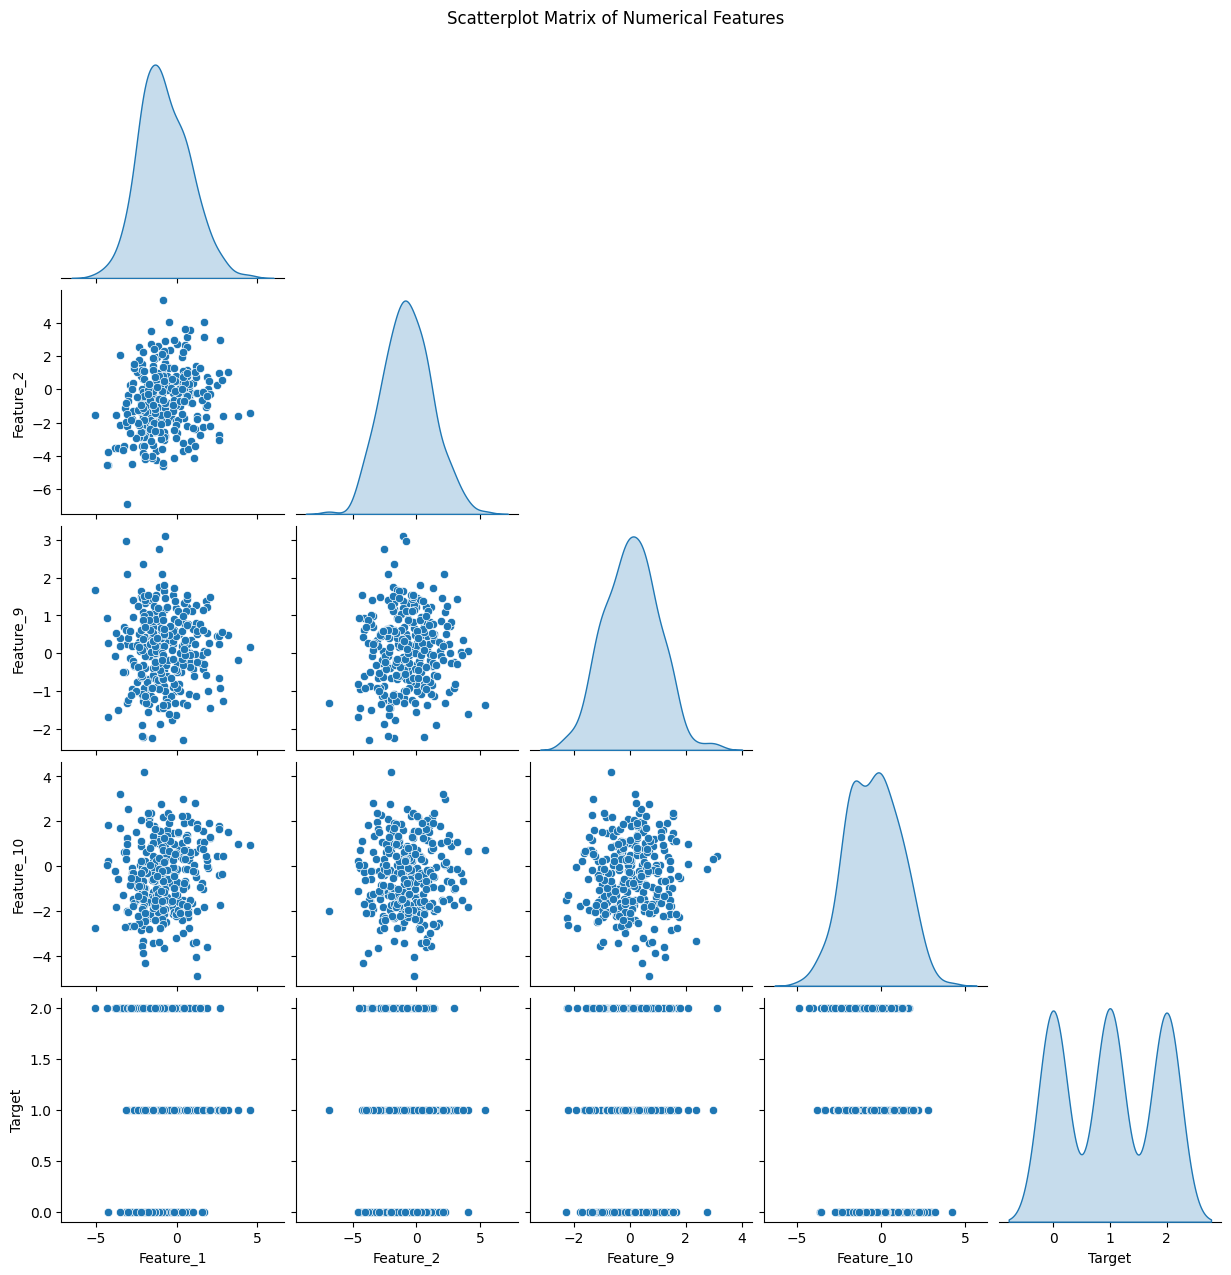

In [9]:
# Select numerical columns - using the actual feature names from the dataframe
num_cols = ['Feature_1', 'Feature_2',  'Feature_9', 'Feature_10', 'Target']

sns.pairplot(df[num_cols], corner=True, diag_kind='kde')
plt.suptitle("Scatterplot Matrix of Numerical Features", y=1.02)
plt.show()

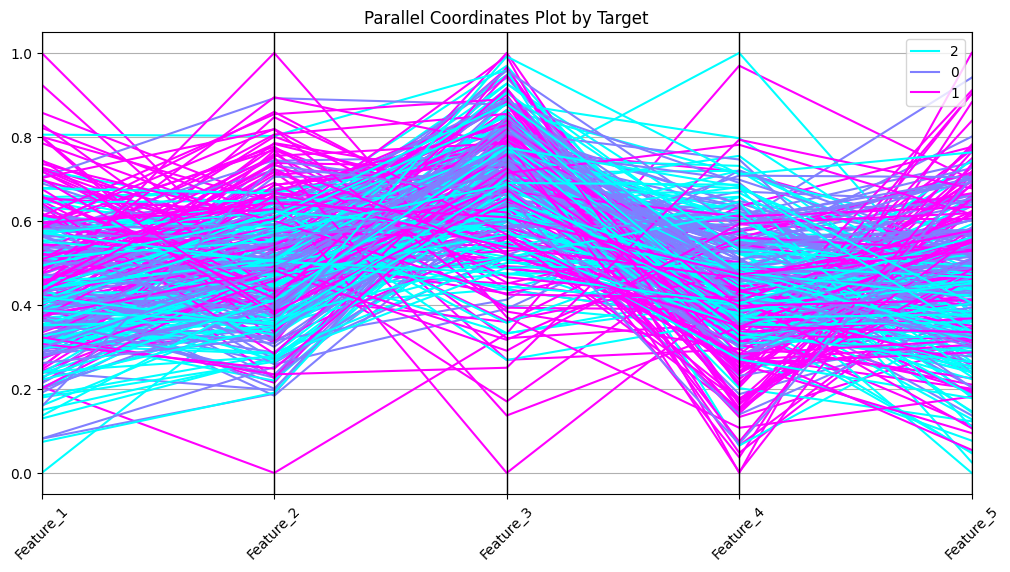

In [11]:
# Normalize data for better scale comparison
from sklearn.preprocessing import MinMaxScaler

# Select features for parallel coordinates plot - using actual feature names
features = ['Feature_1', 'Feature_2', 'Feature_3', 'Feature_4', 'Feature_5'] # Using a subset for clarity
df_scaled = df.copy()
df_scaled[features] = MinMaxScaler().fit_transform(df[features])

# Add target column for coloring
df_scaled['Target'] = df['Target']

plt.figure(figsize=(12, 6))
# Use the Target column for color grouping
parallel_coordinates(df_scaled[features + ['Target']], 'Target', colormap='cool')
plt.title("Parallel Coordinates Plot by Target")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

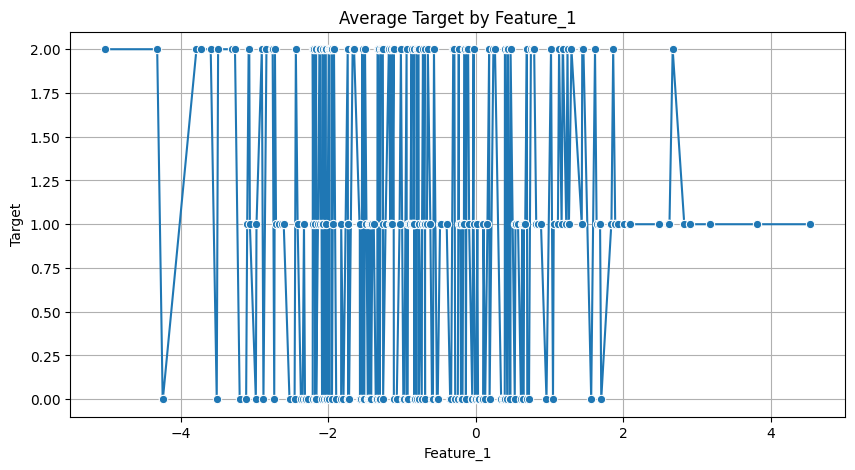

In [13]:
# Line plot of average Target over Feature_1
feature_grouped = df.groupby('Feature_1')['Target'].mean().reset_index()

plt.figure(figsize=(10, 5))
sns.lineplot(data=feature_grouped, x='Feature_1', y='Target', marker='o')
plt.title('Average Target by Feature_1')
plt.xlabel('Feature_1')
plt.ylabel('Target')
plt.grid(True)
plt.show()

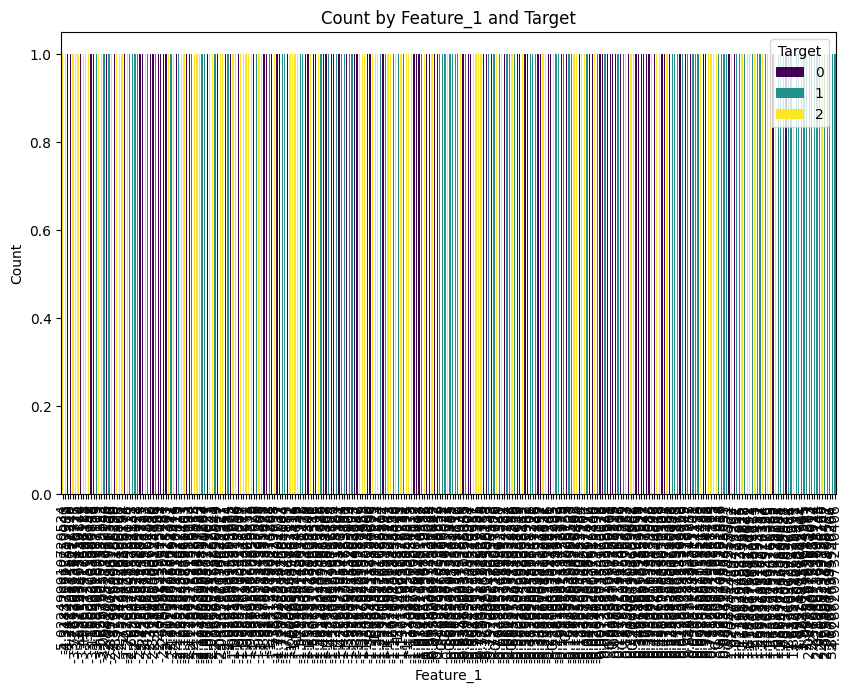

In [15]:
# Group by Feature_1 and Target
sub_data = df.groupby(['Feature_1', 'Target']).size().unstack(fill_value=0)

# Stacked bar chart
sub_data.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='viridis')
plt.title('Count by Feature_1 and Target')
plt.xlabel('Feature_1')
plt.ylabel('Count')
plt.legend(title='Target')
plt.xticks(rotation=90)
plt.show()